In [ ]:
#default_exp prefect_flows.full_pipeline

In [ ]:
#export
from prefect import Flow, Parameter, task
from prefect.tasks.prefect import create_flow_run, wait_for_flow_run, RenameFlowRun
from prefect.engine.results import LocalResult
from corradin_ovp_utils.prefect_flows.step1 import get_config_task
from corradin_ovp_utils.prefect_flows.step1 import dev_flow as step1_flow
from prefect.tasks.templates import StringFormatter
from pathlib import Path
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from omegaconf import OmegaConf, dictconfig


In [ ]:
#export
@task
def process_pairs_file_name(pairs_file):
    return Path("/lab/corradin_biobank/FOR_AN/OVP/corradin_ovp_utils/test_MS_chr22.tsv").stem
create_flow_run_name = StringFormatter(template = "{exp}_{pairs_file}_{today}")

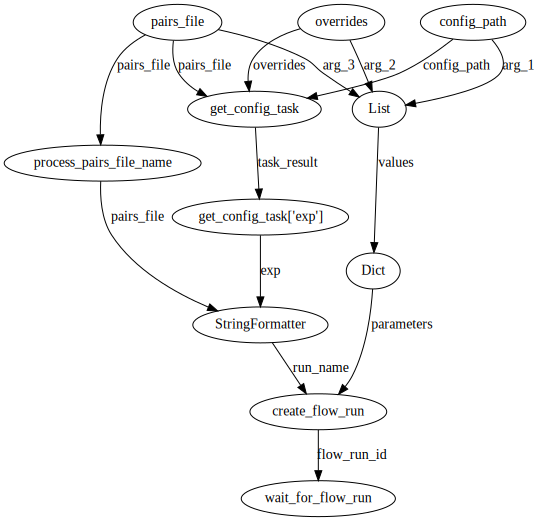

In [ ]:
#export

with Flow("OVP_pipeline", result=LocalResult("./test_prefect_whole_pipeline")) as pipeline:
    config_path = Parameter("config_path", default = "/lab/corradin_biobank/FOR_AN/OVP/corradin_ovp_utils/conf/hydra_conf/")
    overrides = Parameter("overrides", default = ["exp=test_exp", "dataset=test_MS"])
    pairs_file = Parameter("pairs_file", default = "/lab/corradin_biobank/FOR_AN/OVP/corradin_ovp_utils/test_MS_chr22.tsv")
    
    cfg = get_config_task(config_path=config_path, overrides = overrides, pairs_file = pairs_file)
    
    pairs_file_processed = process_pairs_file_name(pairs_file)
    flow_run_name = create_flow_run_name(exp = cfg["exp"], pairs_file = pairs_file_processed)
    
    wait_for_flow_run(create_flow_run(parameters={"config_path": config_path, "overrides": overrides, "pairs_file": pairs_file},
                                      flow_name= "OVP_step1",
                                     project_name= "ovp_prod", run_name= flow_run_name))
    

pipeline.visualize()

In [ ]:
pipeline.run(config_path="/lab/corradin_biobank/FOR_AN/OVP/corradin_ovp_utils/conf/hydra_conf/",
pairs_file="/lab/corradin_biobank/FOR_AN/OVP/corradin_ovp_utils/test_MS_chr22.tsv")

[2021-09-08 05:36:20-0400] INFO - prefect.FlowRunner | Beginning Flow run for 'OVP_pipeline'
[2021-09-08 05:36:20-0400] INFO - prefect.TaskRunner | Task 'config_path': Starting task run...
[2021-09-08 05:36:20-0400] INFO - prefect.TaskRunner | Task 'config_path': Finished task run for task with final state: 'Success'
[2021-09-08 05:36:20-0400] INFO - prefect.TaskRunner | Task 'pairs_file': Starting task run...
[2021-09-08 05:36:20-0400] INFO - prefect.TaskRunner | Task 'pairs_file': Finished task run for task with final state: 'Success'
[2021-09-08 05:36:20-0400] INFO - prefect.TaskRunner | Task 'overrides': Starting task run...
[2021-09-08 05:36:20-0400] INFO - prefect.TaskRunner | Task 'overrides': Finished task run for task with final state: 'Success'
[2021-09-08 05:36:20-0400] INFO - prefect.TaskRunner | Task 'List': Starting task run...
[2021-09-08 05:36:20-0400] INFO - prefect.TaskRunner | Task 'List': Finished task run for task with final state: 'Success'
[2021-09-08 05:36:20-04

<Success: "All reference tasks succeeded.">